<a href="https://colab.research.google.com/github/Vaibhav212000/sensor_fusion/blob/master/Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
file_path = ('/content/drive/MyDrive/Dataset')

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

with open("/content/drive/MyDrive/Dataset/kddcup.names", 'r') as f:
  print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [27]:
cols ="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns = []
for c in cols.split(',\n'):
  if(c.strip()):
    columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [28]:
with open('/content/drive/MyDrive/Dataset/training_attack_types' , "r") as f:
  print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [30]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [31]:
path = '/content/drive/MyDrive/Dataset/kddcup.data_10_percent.gz'
df = pd.read_csv(path, names = columns)

df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [33]:
df.shape

(494021, 43)

In [34]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [35]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

<function matplotlib.pyplot.show(close=None, block=None)>

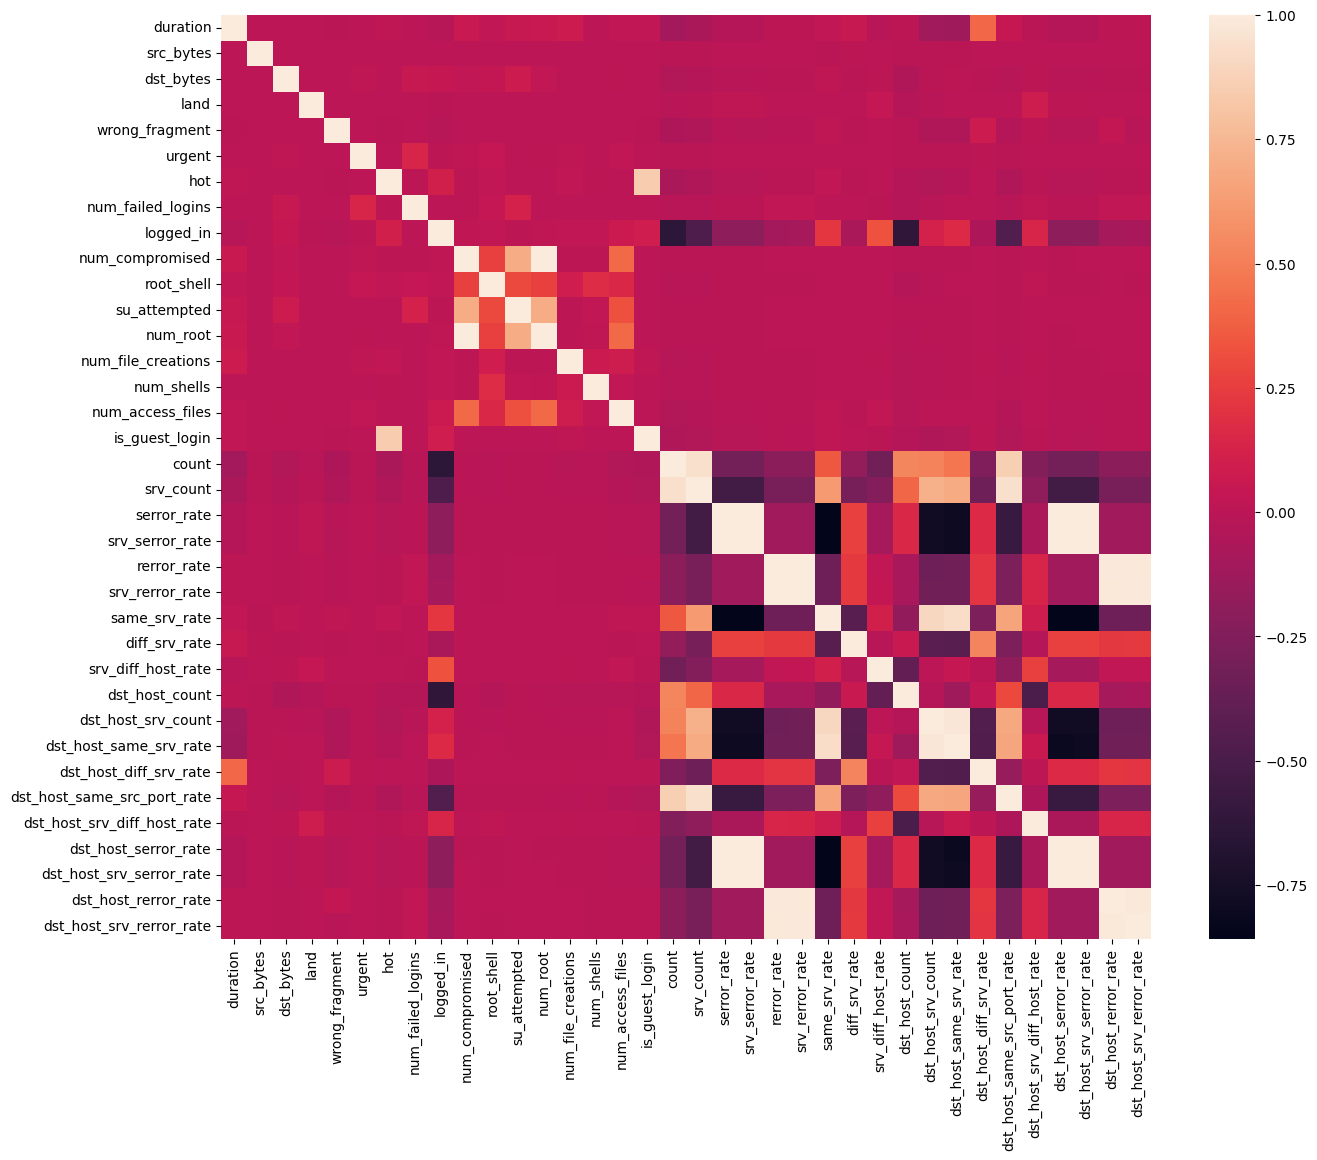

In [38]:
df= df.dropna(axis='columns')

ndf = df[[col for col in df.columns if df[col].nunique()> 1 and pd.api.types.is_numeric_dtype(df[col])]]

corr = ndf.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show

In [39]:
df.drop('num_root', axis = 1, inplace = True)
df.drop('srv_serror_rate', axis = 1, inplace = True)
df.drop('srv_rerror_rate', axis = 1, inplace = True)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

In [40]:
pmap = {'icmp': 0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [41]:
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [42]:
df.drop('service', axis = 1, inplace = True)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [44]:
df = df.drop(['target', ], axis = 1)
print(df.shape)

# Target variable and train set
y = df[['Attack Type']]
X = df.drop(['Attack Type', ], axis = 1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(494021, 33)
(330994, 32) (163027, 32)
(330994, 1) (163027, 1)


In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clfg = GaussianNB()
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Tranining time: ", end_time-start_time)

Tranining time:  1.1203203201293945


In [51]:
start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.8090908527374268


In [52]:
print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


In [54]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:", clfd.score(X_test, y_test))

Training time:  1.3504278659820557
Testing time:  0.04972243309020996
Train score is: 0.9939424883834752
Test score is: 0.9938476448686414


In [55]:
from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfr.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:", clfr.score(X_test, y_test))

Training time:  10.777671813964844
Testing time:  0.6188864707946777
Train score is: 0.9999969787971987
Test score is: 0.999717838149509


In [56]:
from sklearn.svm import SVC

clfs = SVC(gamma = 'scale')
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfs.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)
print("Train score is:", clfs.score(X_train, y_train))
print("Test score is:", clfs.score(X_test, y_test))

Training time:  462.14401602745056
Testing time:  123.7223756313324
Train score is: 0.9987462008374774
Test score is: 0.9987854772522343


In [57]:
from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfl.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Train score is:", clfl.score(X_train, y_train))
print("Test score is:", clfl.score(X_test, y_test))

Training time:  9.634193897247314
Testing time:  0.09415745735168457
Train score is: 0.9935044139772926
Test score is: 0.9934796076723488


In [58]:
from sklearn.ensemble import GradientBoostingClassifier

clfg = GradientBoostingClassifier(random_state = 0)
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))

Training time:  426.2299852371216
Testing time:  3.478533983230591
Train score is: 0.9991389572016411
Test score is: 0.9990553711961823


<BarContainer object of 6 artists>

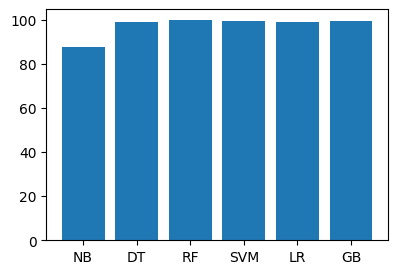

In [59]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [87.951, 99.058, 99.997, 99.875, 99.352, 99.793]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

<BarContainer object of 6 artists>

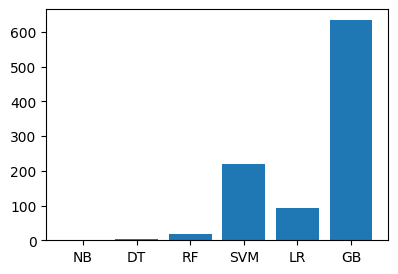

In [60]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [1.11452, 2.44087, 17.08491, 218.26840, 92.94222, 633.229]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

<BarContainer object of 6 artists>

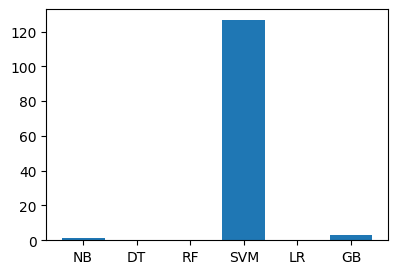

In [61]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [1.54329, 0.14877, 0.199471, 126.50875, 0.09605, 2.95039]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)